In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install ultralytics
!pip install squarify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 6.7 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

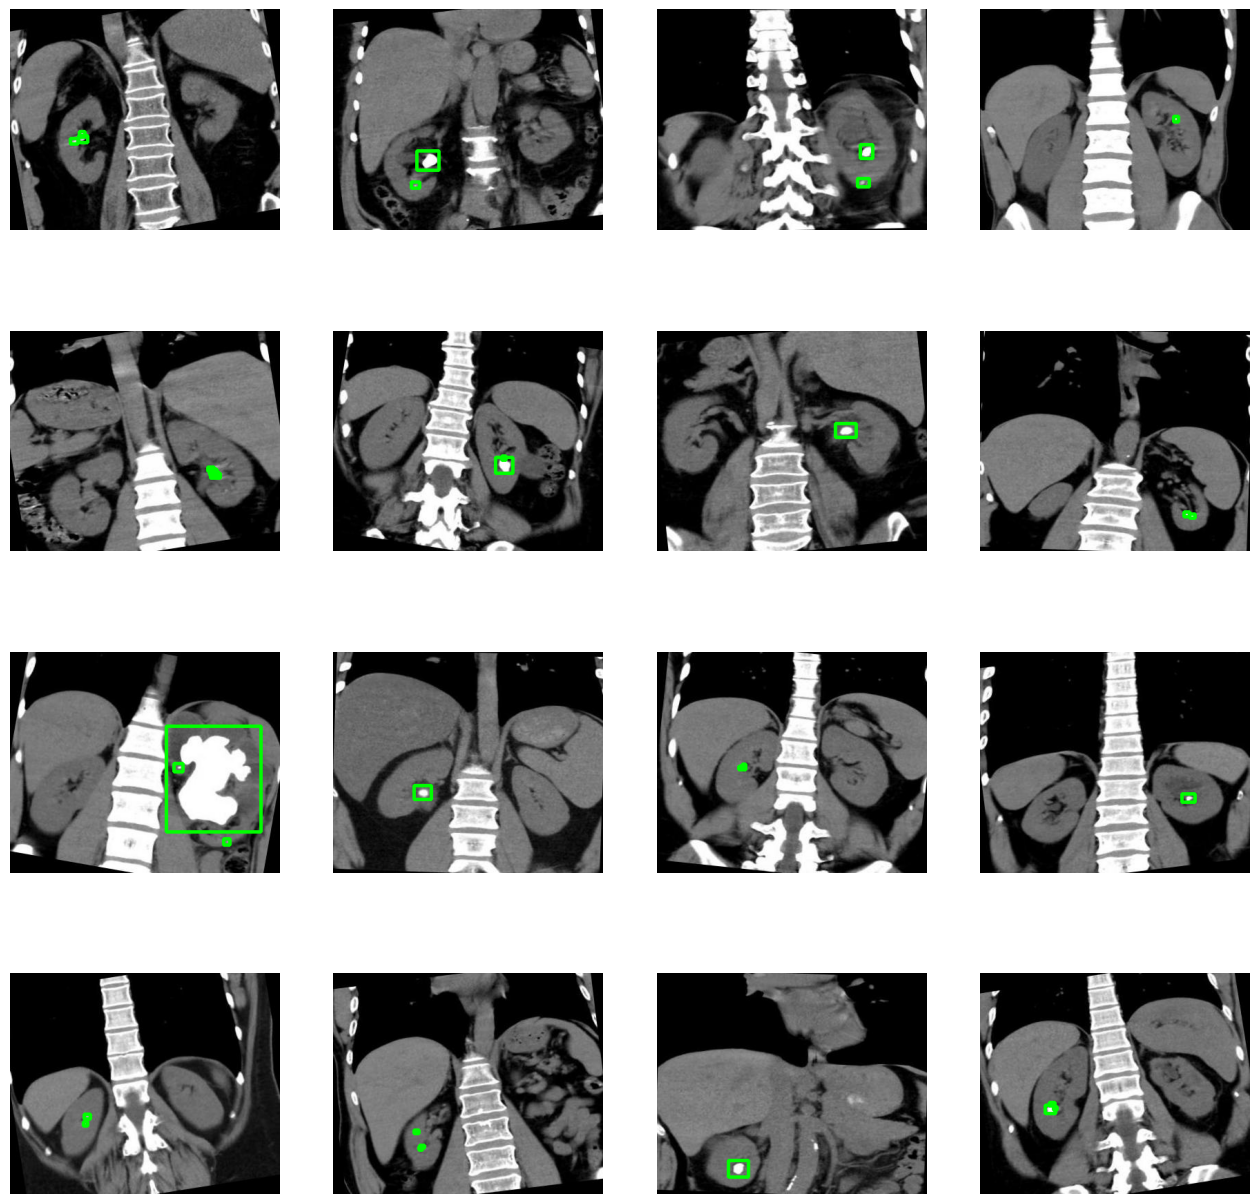

In [4]:
train_images = "/content/gdrive/MyDrive/Colab Notebooks/yolov8/BobrekTasiTespiti/datasets/train/images"
train_labels = "/content/gdrive/MyDrive/Colab Notebooks/yolov8/BobrekTasiTespiti/datasets/train/labels"

test_images = "/content/gdrive/MyDrive/Colab Notebooks/yolov8/BobrekTasiTespiti/datasets/test/images"
test_labels = "/content/gdrive/MyDrive/Colab Notebooks/yolov8/BobrekTasiTespiti/datasets/test/labels"

val_images = "/content/gdrive/MyDrive/Colab Notebooks/yolov8/BobrekTasiTespiti/datasets/valid/images"
val_labels = "/content/gdrive/MyDrive/Colab Notebooks/yolov8/BobrekTasiTespiti/datasets/valid/labels"

image_files = os.listdir(train_images)

random_images = random.sample(image_files, 16)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [5]:
model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:00<00:00, 303MB/s]


In [6]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

model.train(data ='/content/gdrive/MyDrive/Colab Notebooks/yolov8/BobrekTasiTespiti/datasets/data.yaml',
            seed = 42,
            epochs = 25,
            lr0=0.001)

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/gdrive/MyDrive/Colab Notebooks/yolov8/BobrekTasiTespiti/datasets/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mask

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x781a34383040>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

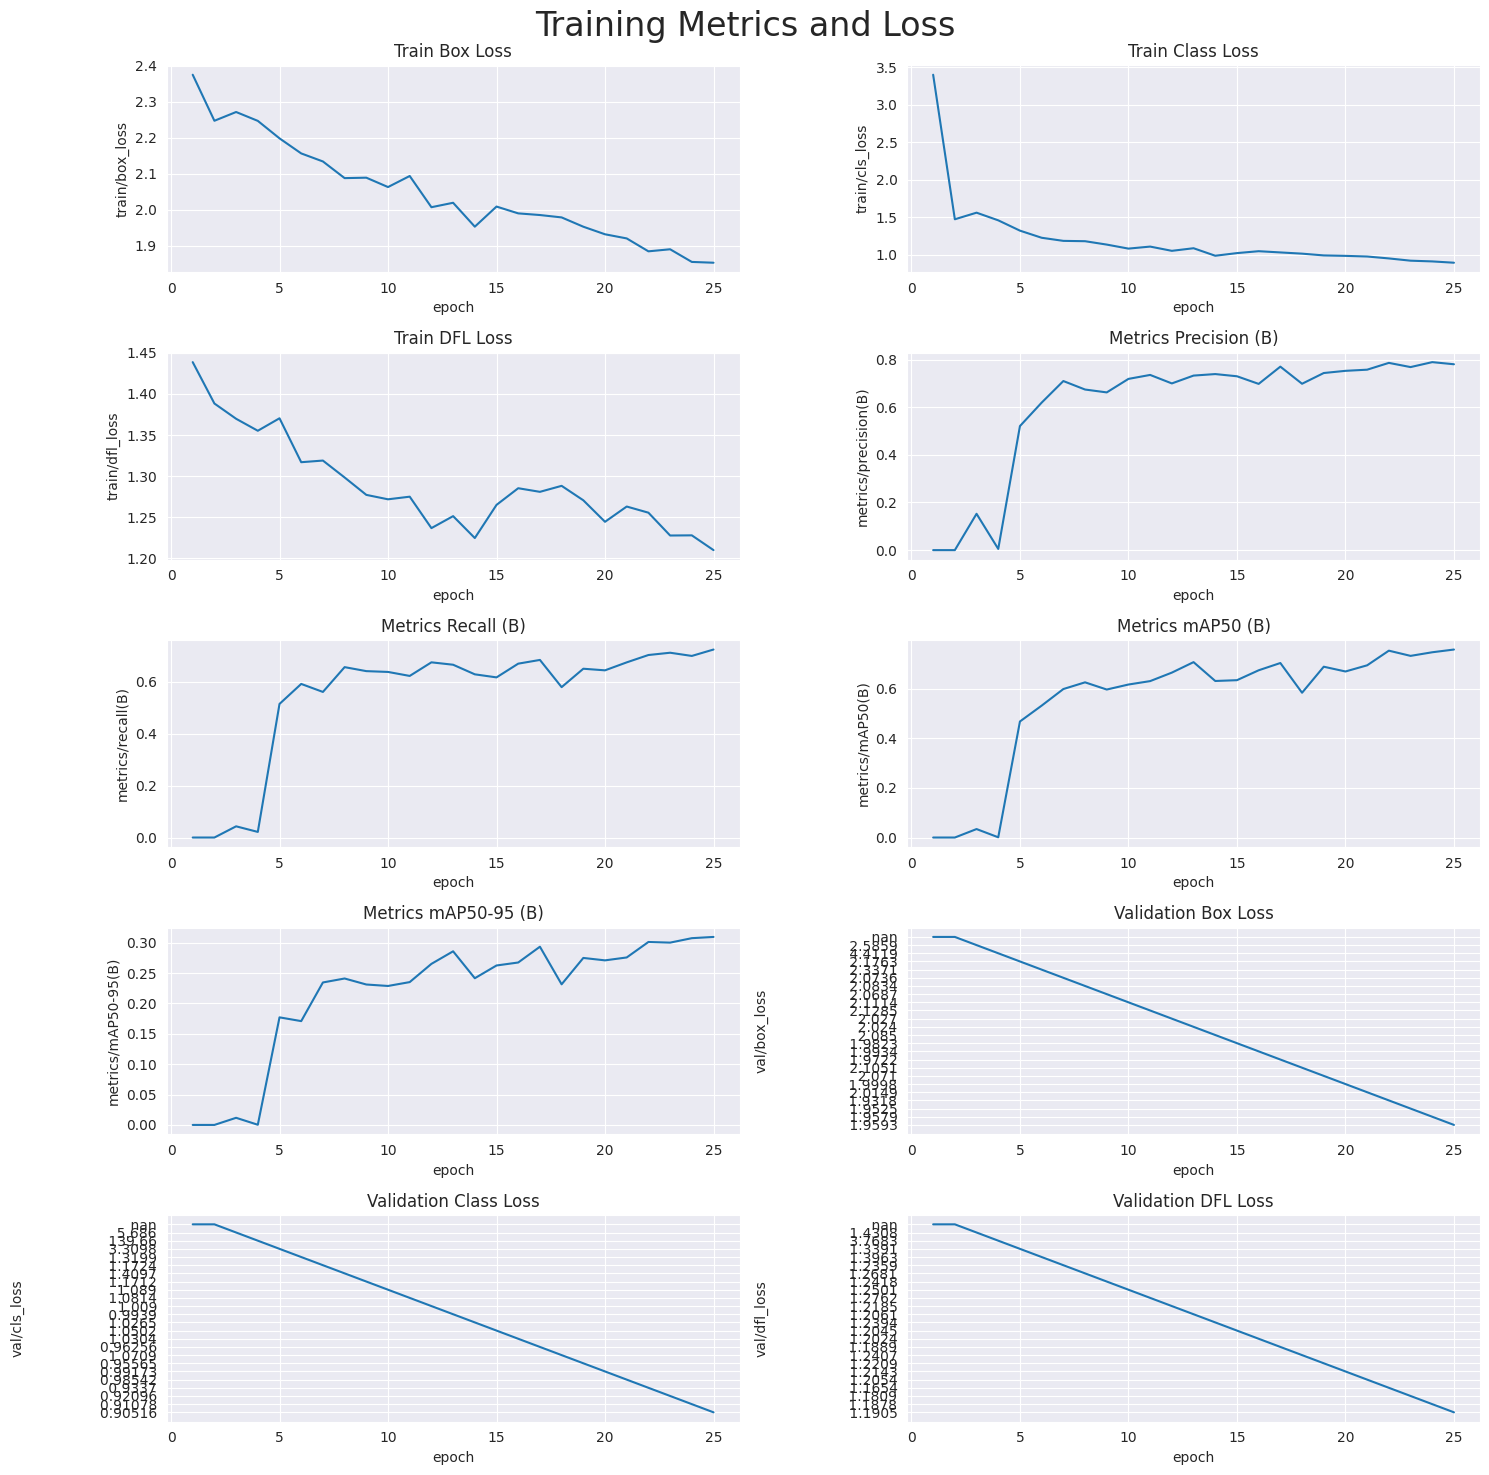

In [8]:
%matplotlib inline
df = pd.read_csv('/content/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)

plt.subplots_adjust(top=0.8)

plt.tight_layout()

plt.show()

In [9]:
%matplotlib inline

model = YOLO('/content/runs/detect/train/weights/best.pt')

metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/gdrive/MyDrive/Colab Notebooks/yolov8/BobrekTasiTespiti/datasets/test/labels... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:55<00:00,  2.22it/s]
val: New cache created: /content/gdrive/MyDrive/Colab Notebooks/yolov8/BobrekTasiTespiti/datasets/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]
                   all        123        224      0.816      0.692      0.772       0.38
Speed: 0.6ms preprocess, 50.8ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val


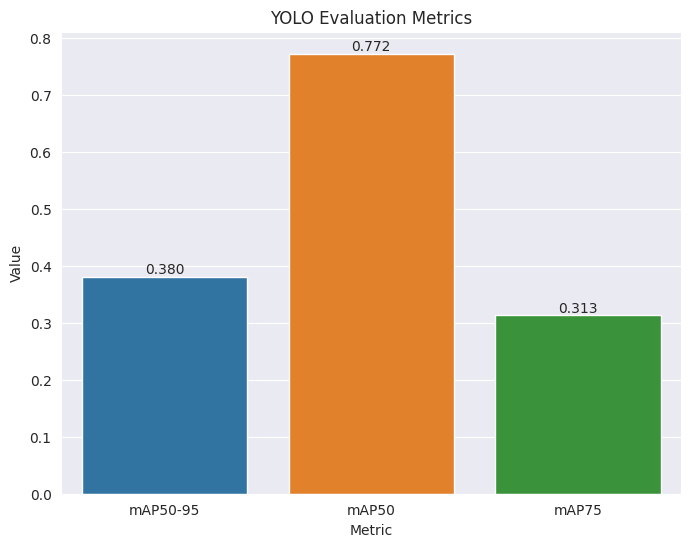

In [10]:
%matplotlib inline

ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

fig = plt.gcf()
fig.set_size_inches(8, 6)

for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

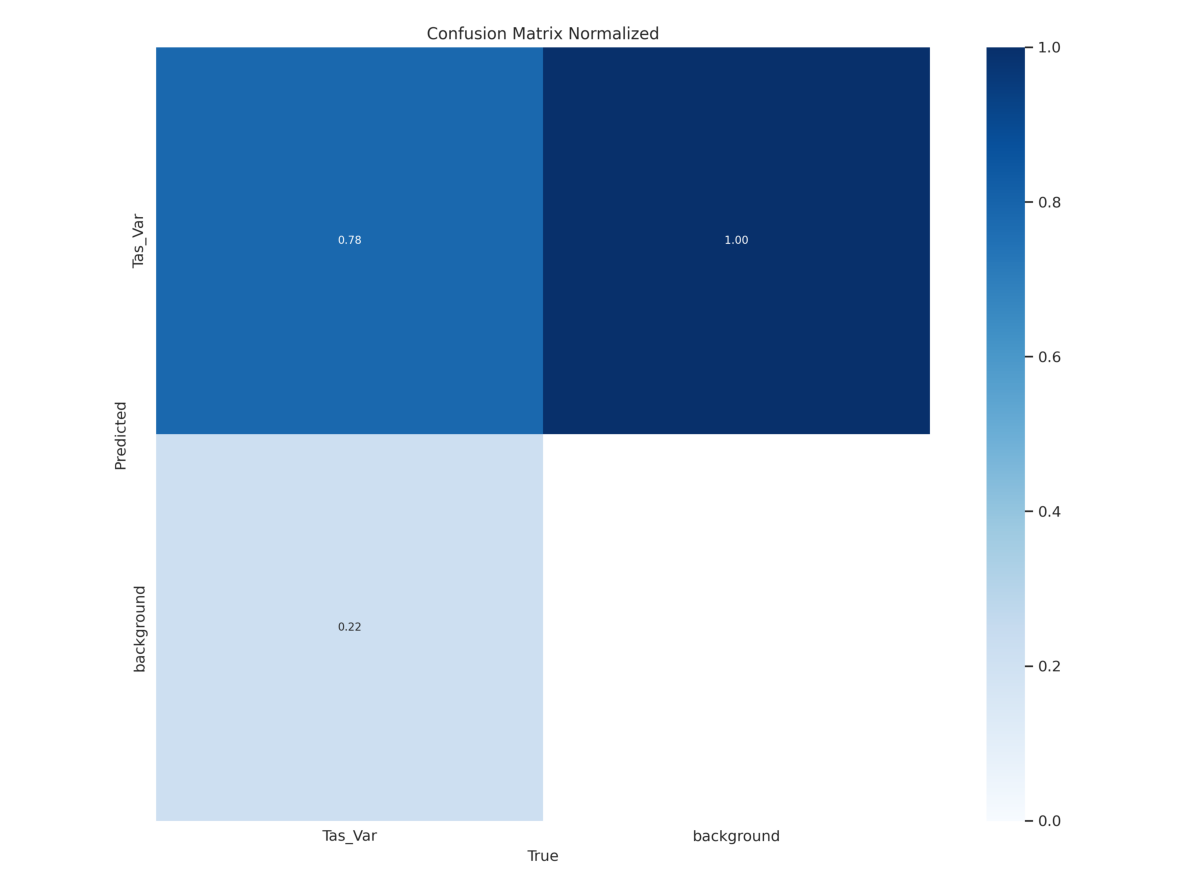

In [11]:
%matplotlib inline

img = mpimg.imread('/content/runs/detect/train/confusion_matrix_normalized.png')

fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [12]:
def ship_detect(img_path):

    img = cv2.imread(img_path)

    detect_result = model(img)

    detect_img = detect_result[0].plot()

    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 544x640 1 Tas_Var, 491.0ms
Speed: 4.4ms preprocess, 491.0ms inference, 21.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 5 Tas_Vars, 113.4ms
Speed: 4.3ms preprocess, 113.4ms inference, 3.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 74.5ms
Speed: 3.9ms preprocess, 74.5ms inference, 3.1ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 64.9ms
Speed: 3.8ms preprocess, 64.9ms inference, 3.1ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 2 Tas_Vars, 64.2ms
Speed: 10.4ms preprocess, 64.2ms inference, 12.3ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 56.2ms
Speed: 10.9ms preprocess, 56.2ms inference, 21.7ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 50.9ms
Speed: 17.2ms preprocess, 50.9ms inference, 3.2ms postprocess per image at shape (1, 3, 544, 640)

0: 544x640 1 Tas_Var, 68.4ms
Speed: 9.2ms preprocess, 68.4ms inference, 2.5ms postprocess per imag

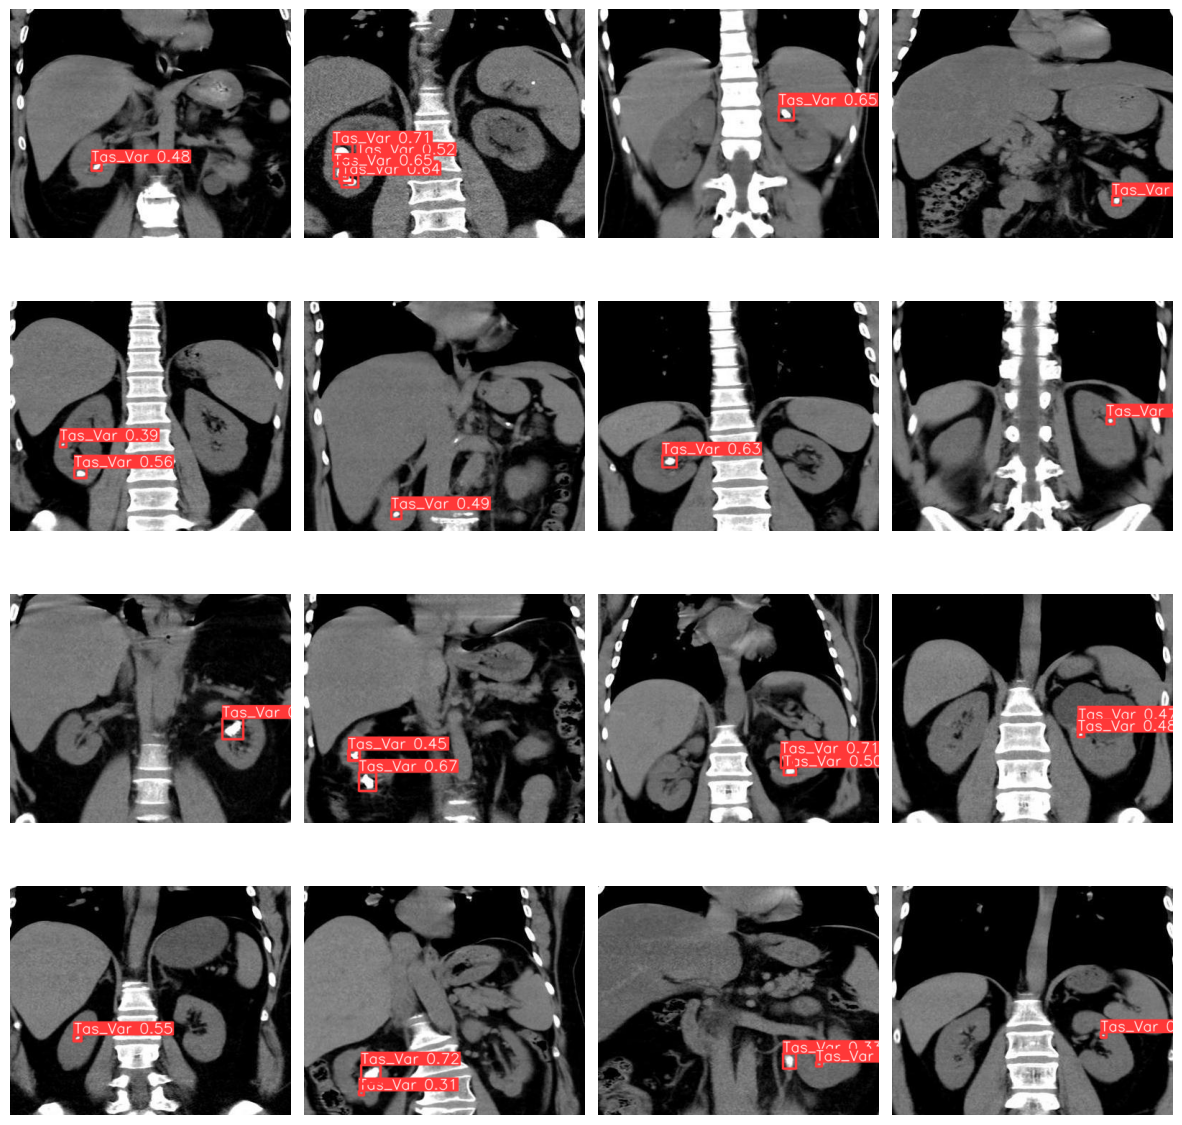

In [15]:
custom_image_dir = '/content/gdrive/MyDrive/Colab Notebooks/yolov8/BobrekTasiTespiti/datasets/test/images'

image_files = os.listdir(custom_image_dir)

selected_images = random.sample(image_files, 16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):

    row_idx = i // 4
    col_idx = i % 4

    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)

    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)